In [1]:
#Classic tools
import matplotlib.pyplot as plt
import numpy as np

#Custom tools
import utils.sample_plan as sp
import utils.data_generator as dg
from utils.pinn import *
import utils.scipy_fitting as sf

#Model
from utils.models_catalogue import glycolysis_model

c:\Users\Raph\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
param = {"J0":2.5,"k1":100,"k2":6,
         "k3" : 16,"k4" : 100, "k5":1.28,
         "k6":12,"k":1.8,"kappa":13,"q":4,
         "K1":0.52,"psi":0.1,"N":1,"A":4}

t_max = 10

x_ini = [0.50144272,1.95478666,0.19788759,0.14769148,0.16059078,0.16127341,0.06404702]

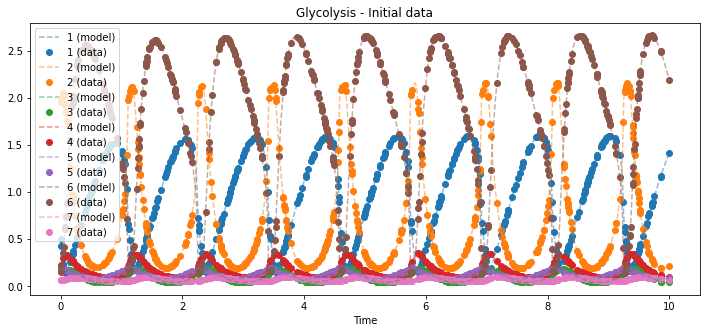

In [3]:
sample_plan_g = sp.sample_plan(tmax=t_max, nbpoint=500, plan_type="random")

datagen = dg.data_generator(glycolysis_model, param, t_max, x_ini, 
                            labels_states=["1", "2", "3", "4", "5", "6", "7"],
                            model_name="Glycolysis")

plt.figure(figsize=(12, 5))
datagen.get_data(plan=sample_plan_g, noise_intensity=0., noise_seed=None, plot_data=True, permissible_range=[0, np.inf], default_value=0)

In [4]:
#Init Least Square
leastsquare = sf.scipy_fitting(glycolysis_model, datagen)
leastsquare.get_train_data(new_gen_data = False)

We will use the same t_samples for all states for the curve_fit method


In [5]:
#Estimation
param_guess = {"J0":5,"k1":125,"k2":10,
         "k3" : 10,"k4" : 85, "k5":2.5,
         "k6":10,"k":2.5,"kappa":10,"q":5,
         "K1":1,"psi":1,"N":1,"A":5}
t_rebuild, state_rebuild = leastsquare.predict(params0=param_guess, X_0=x_ini)
leastsquare.basic_plot(elements_to_plot={"simulation":[0,1,2,3,4,5,6],
                                         "data":[0,1,2,3,4,5,6],
                                         "prediction":[0,1,2,3,4,5,6]})

Prediction with curve_fit method (common t_samples)


c:\Users\Raph\Documents\Ecole\3-Centrale Supélec\3A CS\4-Master MSV\4-Projet\msv_projet\utils\models_catalogue.py:15: RuntimeWarning: invalid value encountered in scalar power
  v1 = param["k1"] * state[0] * state[5] / (1 + (state[5] / param["K1"]) ** param["q"])
c:\Users\Raph\Documents\Ecole\3-Centrale Supélec\3A CS\4-Master MSV\4-Projet\msv_projet\utils\scipy_fitting.py:67: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  return odeint(self.model_derivatives, state, t, args=(full_params,), atol=1e-8, rtol=1e-11)


: 

In [ ]:
#performance Least Square
leastsquare.performance()

{'True parameters fixed:': {},
 'True parameters fitted:': {'J0': 2.5,
  'k1': 100,
  'k2': 6,
  'k3': 16,
  'k4': 100,
  'k5': 1.28,
  'k6': 12,
  'k': 1.8,
  'kappa': 13,
  'q': 4,
  'K1': 0.52,
  'psi': 0.1,
  'N': 1,
  'A': 4},
 'Final fitted parameters:': {'J0': 4.897302844144872,
  'k1': 56.84997509467713,
  'k2': 11.268124780830464,
  'k3': 13.390887001236315,
  'k4': 66.50362607690302,
  'k5': 3.0042953599876743,
  'k6': 12.555550578141231,
  'k': 2.95370863006732,
  'kappa': 12.308797196642939,
  'q': 3.981008182679473,
  'K1': 0.8153154964295227,
  'psi': 0.17055009291003453,
  'N': 1.2184880787873442,
  'A': 4.438779348830535},
 'Computation time (in sec):': 193.8984649181366,
 'MSE data-prediction scipy:': 0.19133779146188742,
 'MSE true model-prediction scipy:': 0.18485826409368167}

In [ ]:
# Init PINN
pinn = pinn(glycolysis_model, datagen,param_guess,{})
pinn.get_train_data()
pde_weights, bc_weights, data_weights = [10,10,10,10,10,10,10], [5,5,5,5,5,5,5], [0.2,0.2,0.2,0.2,0.2,0.2,0.2]
weights = [[0] * 7 + bc_weights + data_weights, pde_weights + bc_weights + data_weights]
lr = 1e-3

In [8]:
pinn.compile_train_model(lr=lr, nnlayers = [1] + [128] * 3 + [7],
                              activation_function="swish", initcond="Glorot normal",
                              weights=weights, niter_weights=[1000,15000])

- - - - Train the PINN - - - -
Fitted parameters:  J0 ; k1 ; k2 ; k3 ; k4 ; k5 ; k6 ; k ; kappa ; q ; K1 ; psi ; N ; A
Fixed parameters:  
Learning rate:  0.001
Architecture:  [1, 128, 128, 128, 2] 


* * * * Part 1 of the training * * * *
Compiling model...
Building feed-forward neural network...
'build' took 0.128287 s



/opt/homebrew/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


ValueError: i=2 is not valid.

# En fixant des paramètres

In [1]:
#Classic tools
import matplotlib.pyplot as plt
import numpy as np

#Custom tools
import utils.sample_plan as sp
import utils.data_generator as dg
from utils.pinn import *
import utils.scipy_fitting as sf

#Model
from utils.models_catalogue import glycolysis_model

c:\Users\Raph\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



## Data

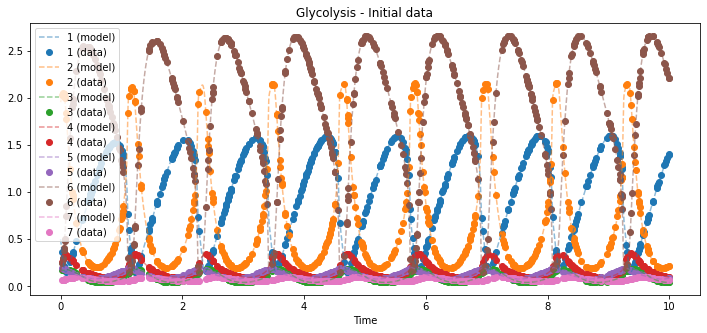

In [2]:
t_max = 10
x_ini = [0.50144272, 1.95478666, 0.19788759, 0.14769148, 0.16059078, 0.16127341, 0.06404702]
param       = {"J0":2.5, "k1":100,  "k2":6, "k3":16, "k4":100, "k5":1.28, "k6":12, "k":1.8, "kappa":13, "q":4, "K1":0.52, "psi":0.1, "N":1, "A":4}
param_guess = {"J0":5,   "k1":125, "k2":10, "k3":10,  "k4":85,  "k5":2.5, "k6":10, "k":2.5, "kappa":10, "q":5,    "K1":1,   "psi":1, "N":1, "A":5}

fitted_params = ['k1']
param_fitted = {key: value for key, value in param_guess.items() if key     in fitted_params}
param_fixed =  {key: value for key, value in param.items()       if key not in fitted_params}


sample_plan_g = sp.sample_plan(tmax=t_max, nbpoint=500, plan_type="random")
datagen = dg.data_generator(glycolysis_model, param, t_max, x_ini, 
                            labels_states=["1", "2", "3", "4", "5", "6", "7"], model_name="Glycolysis")
plt.figure(figsize=(12, 5))
datagen.get_data(plan=sample_plan_g, noise_intensity=0., noise_seed=None, plot_data=True, permissible_range=[0, np.inf], default_value=0)


## Scipy integrate - least squares

We will use the same t_samples for all states for the curve_fit method
Prediction with curve_fit method (common t_samples)


{'True parameters fixed:': {'J0': 2.5,
  'k2': 6,
  'k3': 16,
  'k4': 100,
  'k5': 1.28,
  'k6': 12,
  'k': 1.8,
  'kappa': 13,
  'q': 4,
  'K1': 0.52,
  'psi': 0.1,
  'N': 1,
  'A': 4},
 'True parameters fitted:': {'k1': 100},
 'Final fitted parameters:': {'k1': 143.6281648267793},
 'Training time (in sec):': 125.37746572494507,
 'MSE data-prediction scipy:': 0.3014897812551484,
 'MSE true model-prediction scipy:': 0.30658717569054256}

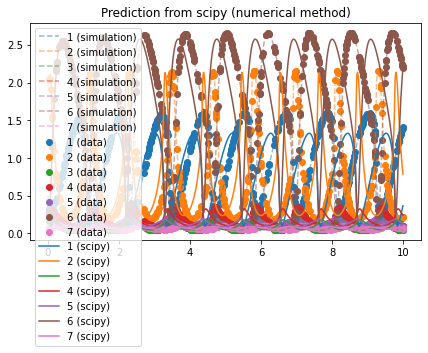

In [3]:
leastsquare_fix = sf.scipy_fitting(glycolysis_model, datagen)
leastsquare_fix.get_train_data(new_gen_data = False)

t_rebuild, state_rebuild = leastsquare_fix.predict(params0=param_fitted, X_0=x_ini, fixed_params=param_fixed)

leastsquare_fix.basic_plot(elements_to_plot={"simulation":list(range(7)), "data":list(range(7)), "prediction":list(range(7))}, file_save_fig=None)
leastsquare_fix.performance()

## PINN

In [3]:
pinn_fix = pinn(glycolysis_model, datagen, param_fitted, param_fixed)
pinn_fix.get_train_data()

weights = [[10]*7 + [5]*7 + [0.2]*7] # [pde, bc, data]
niter_weights = [100]
architecture = [1] + [128] * 3 + [7]
lr = 1e-3

name_output = "outputs/glycolysis/test"
pinn_fix.compile_train_model(lr=lr, nnlayers = architecture, activation_function="swish", initcond="Glorot normal",
                             weights=weights, niter_weights=niter_weights, metrics=[], file_var_export=name_output+'-loss_hist.dat')

- - - - Train the PINN - - - -
Fitted parameters:  k1
Fixed parameters:  J0 ; k2 ; k3 ; k4 ; k5 ; k6 ; k ; kappa ; q ; K1 ; psi ; N ; A
Learning rate:  0.001
Architecture:  [1, 128, 128, 128, 7] 


* * * * Part 1 of the training * * * *
Compiling model...
Building feed-forward neural network...


c:\Users\Raph\AppData\Local\Programs\Python\Python310\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.245383 s

'compile' took 3.163913 s

Training model...

Step      Train loss                                                                                                                                                                                                            Test loss                                                                                                                                                                                                             Test metric
0         [7.17e+01, 3.99e+01, 6.62e+02, 1.41e+03, 3.29e+02, 4.38e+03, 2.66e-02, 6.71e-01, 2.06e+01, 1.47e-01, 3.31e-01, 1.85e-01, 3.06e-01, 2.17e-02, 2.02e-01, 1.18e-01, 2.70e-03, 2.97e-03, 1.38e-02, 8.09e-01, 5.68e-04]    [7.17e+01, 3.99e+01, 6.62e+02, 1.41e+03, 3.29e+02, 4.38e+03, 2.66e-02, 6.71e-01, 2.06e+01, 1.47e-01, 3.31e-01, 1.85e-01, 3.06e-01, 2.17e-02, 2.02e-01, 1.18e-01, 2.70e-03, 2.97e-03, 1.38e-02, 8.09e-01, 5.68e-04]    []  
4         [3.20e+02, 5.49e+02, 2.36e

Performance of the model: {'True parameters fixed:': {'J0': 2.5, 'k2': 6, 'k3': 16, 'k4': 100, 'k5': 1.28, 'k6': 12, 'k': 1.8, 'kappa': 13, 'q': 4, 'K1': 0.52, 'psi': 0.1, 'N': 1, 'A': 4}, 'True parameters fitted:': {'k1': 100}, 'Final fitted parameters:': {'k1': 125.0}, 'Training time (in sec):': 59.06239438056946, 'MSE data-prediction NN:': 0.5305762322280775, 'MSE data-prediction model with fitted parameters:': 0.18040340619071735, 'MSE true model-prediction NN:': 0.5313441583763101, 'MSE true model-prediction model with fitted parameters:': 0.21933334895629958}


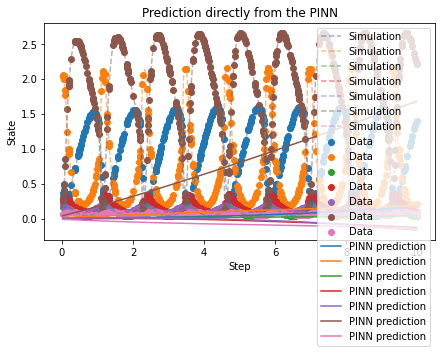

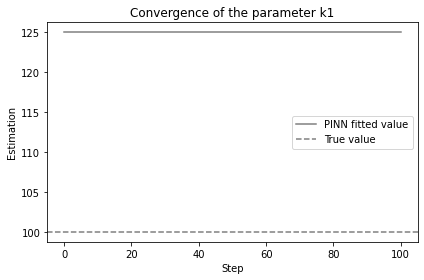

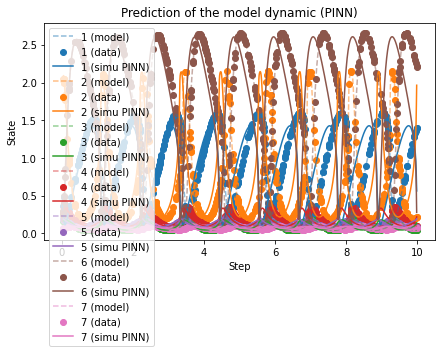

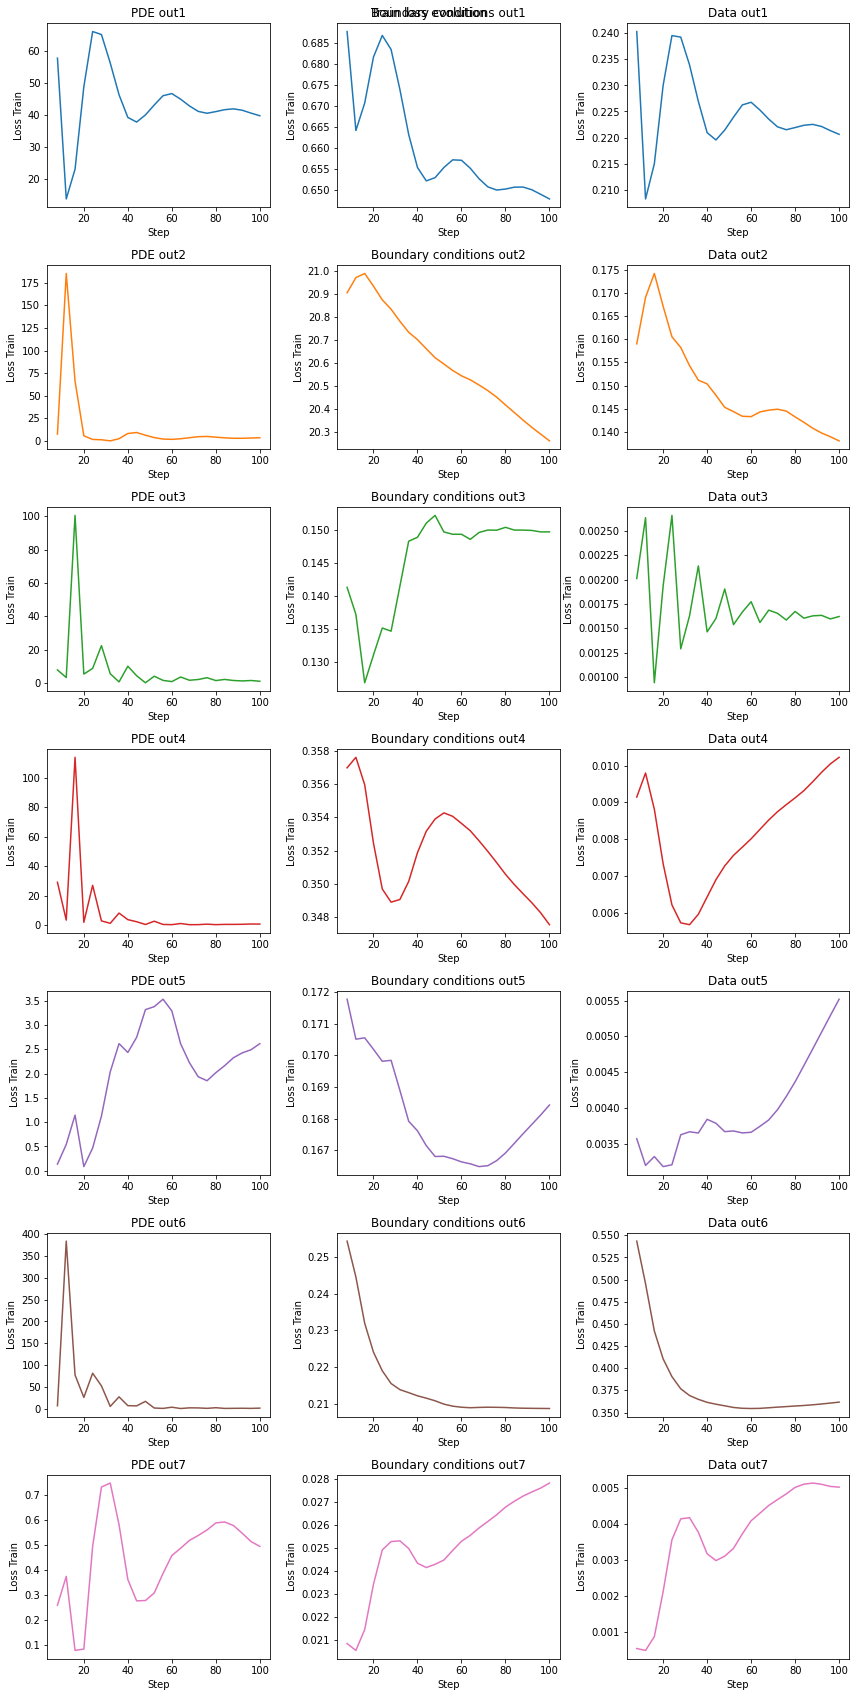

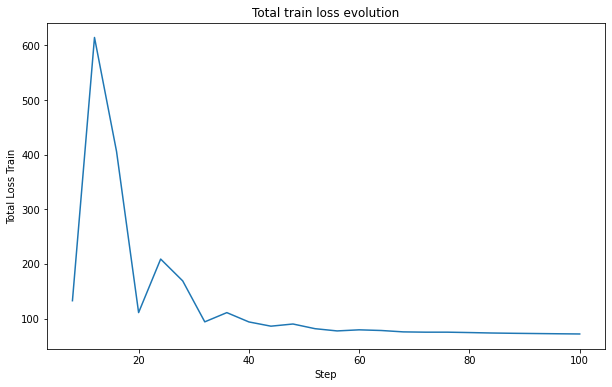

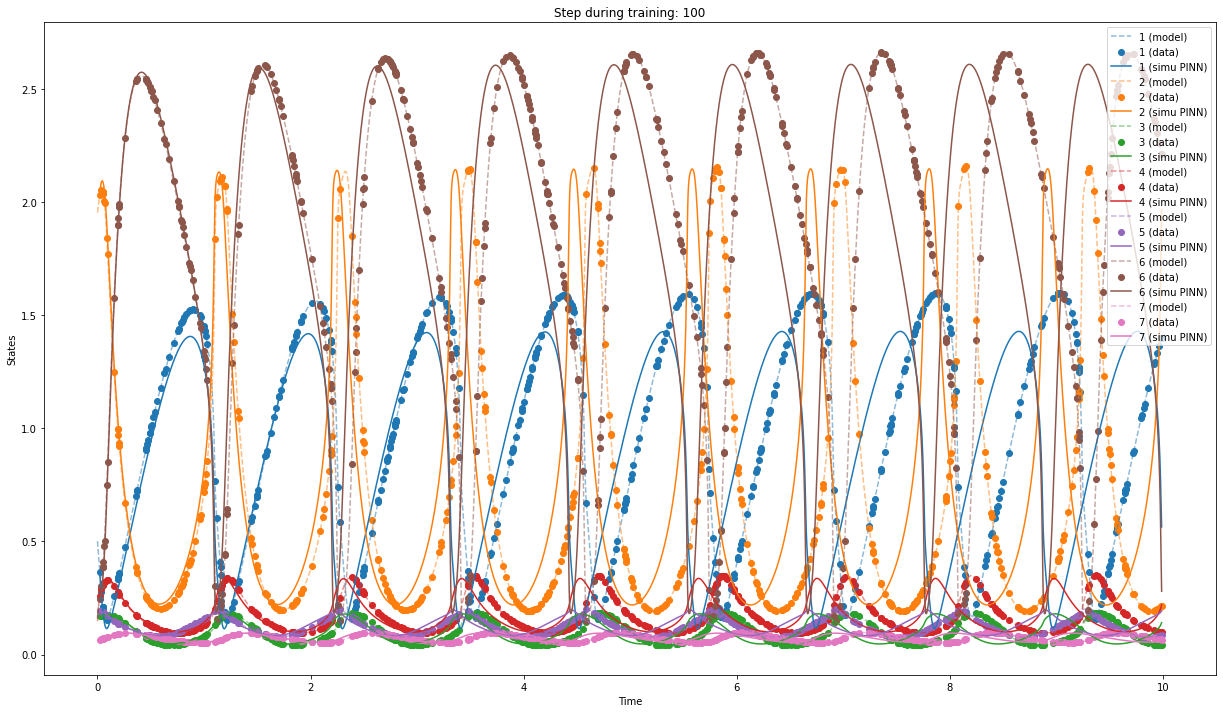

In [4]:
pinn_fix.basic_plot(elements_to_plot={"simulation":list(range(7)), "data":list(range(7)), "prediction":list(range(7))}, 
                    file_save_fig=name_output+'pred_NN.jpg')
pinn_fix.plot_convergence(file_save_fig=name_output+'param_convergence.jpg')
pinn_fix.plot_predicted_dynamic(elements_to_plot={"simulation":list(range(7)), "data":list(range(7)), "prediction":list(range(7))}, 
                                file_save_fig=name_output+'perd_with_param.jpg', nb_p_t=10000)
pinn_fix.plot_loss_history(file_save_fig=name_output+'-loss_hist.jpg', elements_to_plot=["loss_train"], 
                           start_step_idx=2, labels_loss = ["PDE", "Boundary conditions",  "Data"])
pinn_fix.gif_evolution(elements_to_plot={"simulation":list(range(7)), "data":list(range(7)), "prediction":list(range(7))}, 
                       file_save_gif=name_output+'evol_train.gif', nb_p_t=10000, max_gif_duration_in_sec=5)
perf = pinn_fix.performance()
print("Performance of the model:", perf)
pinn_fix.save_possible_attr(filename_save=name_output+"-0_model_data.pkl")
with open(name_output+"-performances.pkl", 'wb') as f:
    pickle.dump(perf, f)